# Getting started to work through Statsmodels documentation

In [1]:
from __future__ import print_function
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

In [2]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [5]:
df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [6]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']
df = df[vars]
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


In [7]:
# to eliminate NaN from fro 85
df = df.dropna()
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C


## Example: Building  an OLS model with the endog (dependent) and exog (independent) variables

In [8]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')

In [13]:
print(X[:3])
y

   Intercept  Region[T.E]  Region[T.N]  Region[T.S]  Region[T.W]  Literacy  \
0        1.0          1.0          0.0          0.0          0.0      37.0   
1        1.0          0.0          1.0          0.0          0.0      51.0   
2        1.0          0.0          0.0          0.0          0.0      13.0   

   Wealth  
0    73.0  
1    22.0  
2    61.0  


,Lottery
0,41.0
1,38.0
2,66.0
3,80.0
4,79.0
5,70.0
6,31.0
7,75.0
8,28.0
9,50.0


In [18]:
#Fitting a model in statsmodels typically involves 3 easy steps:
# 1. Use the model class to describe the model
# 2. Fit the model using a class method
# 3. Inspect the results using a summary method

# For OLS, this is achieved by:
mod = sm.OLS(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           1.07e-05
Time:                        09:24:22   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

Just some ways to interpret the above (from https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate):
- Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual (characteristic #2). We hope to see a value close to zero which would indicate normalcy. The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something close to 1 here. 
- Skew – a measure of data symmetry. We want to see something close to zero, indicating the residual distribution is normal. Note that this value also drives the Omnibus. 
- Kurtosis – a measure of "peakiness", or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers.
- Durbin-Watson – tests for homoscedasticity (characteristic #3). We hope to have a value between 1 and 2. 
- Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test. In this case we do.
- Condition Number – This test measures the sensitivity of a function's output as compared to its input (characteristic #4). When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something below 30.


## Lots of useful tests/tools in statsmodels

In [30]:
# all the possible res attributes can be found with the line:
dir(res)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


In [27]:
# example of one cool tricks that can be done with the 'res' object that we created
res.params


Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [26]:
# Rainbow test for linearity
sm.stats.linear_rainbow(res)

(0.847233997615691, 0.6997965543621644)

In [29]:
# read the docstring of the above for more details
print(sm.stats.linear_rainbow.__doc__)

Rainbow test for linearity

    The Null hypothesis is that the regression is correctly modelled as linear.
    The alternative for which the power might be large are convex, check

    Parameters
    ----------
    res : Result instance

    Returns
    -------
    fstat : float
        test statistic based of F test
    pvalue : float
        pvalue of the test

    


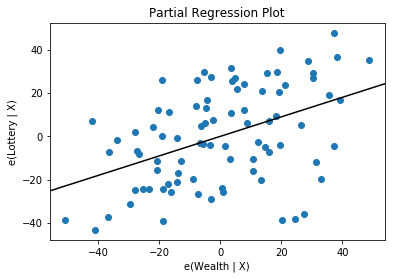

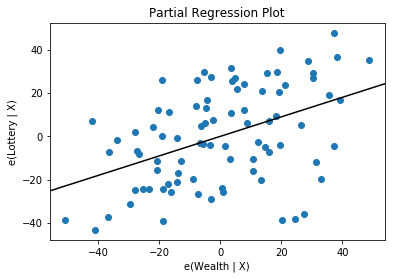

In [31]:
# graphics!
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'],
                             data=df, obs_labels=False)


# Linear Regression

This module allows estimation by ordinary least squares (OLS), weighted least squares (WLS), generalized least squares (GLS), and feasible generalized least squares with autocorrelated AR(p) errors.

In [33]:
import numpy as np
import statsmodels.api as sm

spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)
mod = sm.OLS(spector_data.endog, spector_data.exog)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Thu, 15 Aug 2019   Prob (F-statistic):            0.00157
Time:                        11:32:35   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

/Users/mleong/anaconda3/lib/python3.7/site-packages/statsmodels/datasets/utils.py:100: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exog = np.column_stack(data[field] for field in exog_name)


In [39]:
spector_data.endog

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.])

# Generalized Linear Models

In [41]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

## GLM: Binomial Response Data

In [42]:
print(sm.datasets.star98.NOTE)

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income students
        PERASIAN - Percentage of Asian student
        PERBLACK - Percentage of black students
        PERHISP  - Percentage of Hispanic students
        PERMINTE - Percentage of minority teachers
        AVYRSEXP - Sum of teachers' years in educational service divided by the
                number of teachers.
        AVSALK   - Total salary budget including benefits divided by the number
                   of full-time teachers (in thousands)
        PERSPENK - Per-pupil spending (in thousands)
        PTRATIO  - Pupil-teacher ratio.
        PCTAF    - Percenta

In [44]:
# load the data and add a costant to the exogenous (independent) variables
data = sm.datasets.star98.load()
data.exog = sm.add_constant(data.exog, prepend=False)

/Users/mleong/anaconda3/lib/python3.7/site-packages/statsmodels/datasets/utils.py:89: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  endog = np.column_stack(data[field] for field in endog_name)


In [45]:
# dependent variable is N by 2 (Success: NABOVE, Failure: NBELOW)
print(data.endog[:5,:])

[[452. 355.]
 [144.  40.]
 [337. 234.]
 [395. 178.]
 [  8.  57.]]


In [46]:
# independent variables are all variables described above plus interactions
print(data.exog[:2,:])

[[3.43973000e+01 2.32993000e+01 1.42352800e+01 1.14111200e+01
  1.59183700e+01 1.47064600e+01 5.91573200e+01 4.44520700e+00
  2.17102500e+01 5.70327600e+01 0.00000000e+00 2.22222200e+01
  2.34102872e+02 9.41688110e+02 8.69994800e+02 9.65065600e+01
  2.53522420e+02 1.23819550e+03 1.38488985e+04 5.50403520e+03
  1.00000000e+00]
 [1.73650700e+01 2.93283800e+01 8.23489700e+00 9.31488400e+00
  1.36363600e+01 1.60832400e+01 5.95039700e+01 5.26759800e+00
  2.04427800e+01 6.46226400e+01 0.00000000e+00 0.00000000e+00
  2.19316851e+02 8.11417560e+02 9.57016600e+02 1.07684350e+02
  3.40406090e+02 1.32106640e+03 1.30502233e+04 6.95884680e+03
  1.00000000e+00]]


### Fit and Summary

In [47]:

glm_binom = sm.GLM(data.endog, data.exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                  303
Model:                            GLM   Df Residuals:                      282
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2998.6
Date:                Thu, 15 Aug 2019   Deviance:                       4078.8
Time:                        15:35:45   Pearson chi2:                 4.05e+03
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0168      0.000    -38.749      0.000      -0.018      -0.016
x2             0.0099      0.001     16.505      0.0

### Quantities of Interest

In [48]:
print('Total number of trials:',  data.endog[0].sum())
print('Parameters: ', res.params)
print('T-values: ', res.tvalues)

Total number of trials: 807.0
Parameters:  [-1.68150366e-02  9.92547661e-03 -1.87242148e-02 -1.42385609e-02
  2.54487173e-01  2.40693664e-01  8.04086739e-02 -1.95216050e+00
 -3.34086475e-01 -1.69022168e-01  4.91670212e-03 -3.57996435e-03
 -1.40765648e-02 -4.00499176e-03 -3.90639579e-03  9.17143006e-02
  4.89898381e-02  8.04073890e-03  2.22009503e-04 -2.24924861e-03
  2.95887793e+00]
T-values:  [-38.74908321  16.50473627 -25.1821894  -32.81791308   8.49827113
   4.21247925   5.7749976   -6.16191078  -5.45321673  -5.16865445
   3.92119964 -15.87825999  -7.39093058  -8.44963886  -4.05916246
   6.3210987    6.57434662   5.36229044   7.42806363  -6.44513698
   1.91301155]


First differences: We hold all explanatory variables constant at their means and manipulate the percentage of low income households to assess its impact on the response variables:

In [50]:
means = data.exog.mean(axis=0)
means25 = means.copy()
means25[0] = stats.scoreatpercentile(data.exog[:,0], 25)
means75 = means.copy()
means75[0] = lowinc_75per = stats.scoreatpercentile(data.exog[:,0], 75)
resp_25 = res.predict(means25)
resp_75 = res.predict(means75)
diff = resp_75 - resp_25
print("The interquartile first difference for the percentage " +
      "of low income households in a school district is:")
print("%2.4f%%" % (diff*100))

The interquartile first difference for the percentage of low income households in a school district is:
-11.8753%


### Plots

In [52]:
# extract valuable information for plots
nobs = res.nobs
y = data.endog[:,0]/data.endog.sum(1)
yhat = res.mu

# load graphing library for below
from statsmodels.graphics.api import abline_plot


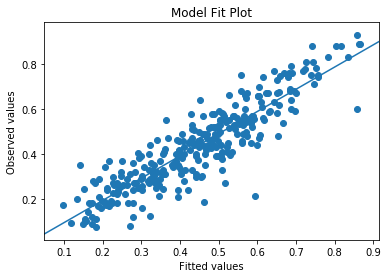

In [53]:
# plot yhat vs y
fig, ax = plt.subplots()
ax.scatter(yhat, y)
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)


ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

Text(0.5, 0, 'Fitted values')

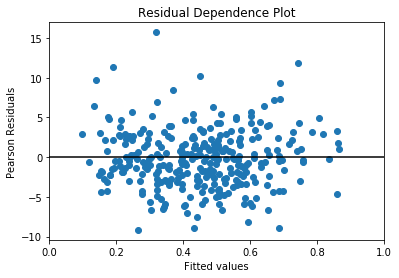

In [54]:
# plot yhat vs Pearson residuals
fig, ax = plt.subplots()

ax.scatter(yhat, res.resid_pearson)
ax.hlines(0, 0, 1)
ax.set_xlim(0, 1)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')

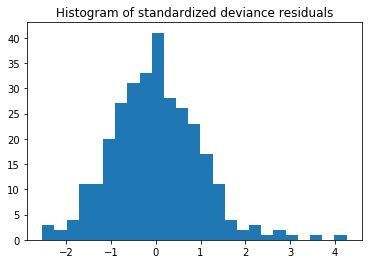

In [55]:
# Histogram of standardized deviation residuals
from scipy import stats

fig, ax = plt.subplots()

resid = res.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=25)
ax.set_title('Histogram of standardized deviance residuals');

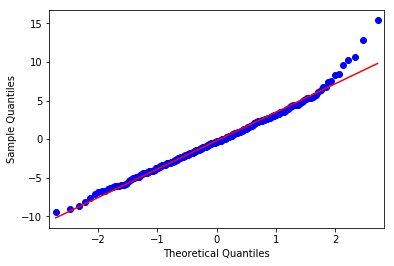

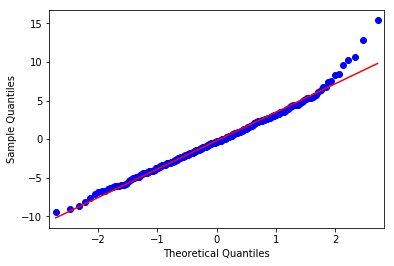

In [56]:
# Q-Q plot of deviance residuals
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')

## GLM: Gamma for proportional count response

In [ ]:
# what is this?